<a href="https://colab.research.google.com/github/asfaqahmedkazi/IMDBProject/blob/main/IMDb_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Check the Dataset & Mount Google Drive**

In [4]:
#Connect to google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/gdrive/MyDrive/IMDB Project Dataset"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

imdb_master.csv



# Library Section

In [3]:
################################################# import libraries ###########################################
!pip install plotly==3.10.0
import pandas as pd
import os
from nltk.corpus import stopwords
import string
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import operator
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import time
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
### Importing special library for Stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

     |████████████████████████████████| 41.5MB 106kB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 3.10.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Modules Section**

---
Define all functions that will be used in the project

In [5]:
def rem_sw(df):
    # Downloading stop words
    stop_words = set(stopwords.words('english'))

    # Removing Stop words from training data
    count = 0
    for sentence in df:
        sentence = [word for word in sentence.lower().split() if word not in stop_words]
        sentence = ' '.join(sentence)
        df.loc[count] = sentence
        count+=1
    return(df)

In [6]:
def rem_punc(df):
    count = 0
    for s in df:
        cleanr = re.compile('<.*?>')
        s = re.sub(r'\d+', '', s)
        s = re.sub(cleanr, '', s)
        s = re.sub("'", '', s)
        s = re.sub(r'\W+', ' ', s)
        s = s.replace('_', '')
        df.loc[count] = s
        count+=1
    return(df)

In [7]:
def lemma(df):

    lmtzr = WordNetLemmatizer()

    count = 0
    stemmed = []
    for sentence in df:    
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(lmtzr.lemmatize(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [8]:
def stemma(df):

    stemmer = SnowballStemmer("english") #SnowballStemmer("english", ignore_stopwords=True)

    count = 0
    stemmed = []
    for sentence in df:
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(stemmer.stem(word))
        sentence = ' '.join(stemmed)
        df.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df)

In [9]:
def get_feature(df, number):
    
    feature_list = []
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)
    
    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Create the feature list
    for f in range(number):
        feature_list.append(sorted_features[f][0])
    
    return(feature_list)

In [10]:
def print_feature(df):
    
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])

    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)

    # Preparing variables
    importances = tree_clf.feature_importances_
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(20):
        print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

    # Plot the feature importances of the forest
    plt.figure(figsize = (20,20))
    plt.title("Feature importances")
    plt.bar(range(100), importances[indices[:100]],
           color="r", align="center")
    plt.xticks(range(100), sorted_features[:100], rotation=90)
    plt.xlim([-1, 100])
    plt.show()

    return()

In [11]:
def get_bestrf(X, y):
    parameters = [
        {
            "n_estimators":[5, 10, 20, 50, 100],
            "criterion":['gini', 'entropy']
        }
    ]

    best_clf = GridSearchCV(clf, parameters, scoring="accuracy", verbose=5, n_jobs=4)

    best_clf.fit(X, y)
    
    return(best_clf.best_estimator_.n_estimators, best_clf.best_estimator_.criterion)

**Stage 1:**

---
Data Import & Cleaning

In [32]:
############################## Loading Data #########################################
df_master = pd.read_csv("/content/gdrive/MyDrive/IMDB Project Dataset/imdb_master.csv", encoding='latin-1', index_col = 0)

##################### Seperating the data in to train and test set #############################
imdb_train = df_master[["review", "label","file"]][df_master.type.isin(['train'])].reset_index(drop=True)
imdb_test = df_master[["review", "label","file"]][df_master.type.isin(['test'])].reset_index(drop=True)

#Check the Train Dataset
imdb_train
#Check the Test Dataset
imdb_test

,review,label,file
0,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,This is an example of why the majority of acti...,neg,10000_4.txt
2,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
...,...,...,...
24995,I was extraordinarily impressed by this film. ...,pos,9998_8.txt
24996,"Although I'm not a golf fan, I attended a snea...",pos,9999_10.txt
24997,"From the start of ""The Edge Of Love"", the view...",pos,999_8.txt
24998,"This movie, with all its complexity and subtle...",pos,99_10.txt


In [34]:
imdb_train.describe()

,review,label,file
count,75000,75000,75000
unique,74057,3,75000
top,How has this piece of crap stayed on TV this l...,unsup,46391_0.txt
freq,5,50000,1


In [35]:
imdb_test.describe()

,review,label,file
count,25000,25000,25000
unique,24801,2,25000
top,Loved today's show!!! It was a variety and not...,pos,11804_1.txt
freq,5,12500,1


In [36]:
##################################### Removing Stop words from training data ##################################

imdb_train['review'] = rem_sw(imdb_train['review'])
##################################### Removing Stop words from testing data ###################################

imdb_test['review'] = rem_sw(imdb_test['review'])

#Check the Train Dataset
imdb_train
#Check the Test Dataset
imdb_test

,review,label,file
0,mr. costner dragged movie far longer necessary...,neg,0_2.txt
1,example majority action films same. generic bo...,neg,10000_4.txt
2,"first hate moronic rappers, could'nt act gun p...",neg,10001_1.txt
3,"even beatles could write songs everyone liked,...",neg,10002_3.txt
4,brass pictures (movies fitting word them) real...,neg,10003_3.txt
...,...,...,...
24995,extraordinarily impressed film. one best sport...,pos,9998_8.txt
24996,"although i'm golf fan, attended sneak preview ...",pos,9999_10.txt
24997,"start ""the edge love"", viewer transported stri...",pos,999_8.txt
24998,"movie, complexity subtlety, makes one thought-...",pos,99_10.txt


In [37]:
###################################### Removing punctuations from Train set ##################################

imdb_train['review'] = rem_punc(imdb_train['review'])
###################################### Removing punctuations from Test set ###################################

imdb_test['review'] = rem_punc(imdb_test['review'])

#Check the Train Dataset
imdb_train
#Check the Test Dataset
imdb_test

,review,label,file
0,mr costner dragged movie far longer necessary ...,neg,0_2.txt
1,example majority action films same generic bor...,neg,10000_4.txt
2,first hate moronic rappers couldnt act gun pre...,neg,10001_1.txt
3,even beatles could write songs everyone liked ...,neg,10002_3.txt
4,brass pictures movies fitting word them really...,neg,10003_3.txt
...,...,...,...
24995,extraordinarily impressed film one best sports...,pos,9998_8.txt
24996,although im golf fan attended sneak preview mo...,pos,9999_10.txt
24997,start the edge love viewer transported strikin...,pos,999_8.txt
24998,movie complexity subtlety makes one thought pr...,pos,99_10.txt


In [38]:
############################################### Stemming Train set ##########################################

imdb_train['review'] = lemma(imdb_train['review'])
imdb_train['review'] = stemma(imdb_train['review'])

#Check the Train Dataset
imdb_train
#Check the Test Dataset
imdb_test

,review,label,file
0,mr costner dragged movie far longer necessary ...,neg,0_2.txt
1,example majority action films same generic bor...,neg,10000_4.txt
2,first hate moronic rappers couldnt act gun pre...,neg,10001_1.txt
3,even beatles could write songs everyone liked ...,neg,10002_3.txt
4,brass pictures movies fitting word them really...,neg,10003_3.txt
...,...,...,...
24995,extraordinarily impressed film one best sports...,pos,9998_8.txt
24996,although im golf fan attended sneak preview mo...,pos,9999_10.txt
24997,start the edge love viewer transported strikin...,pos,999_8.txt
24998,movie complexity subtlety makes one thought pr...,pos,99_10.txt


In [39]:
############################################### Stemming Test set ###########################################

imdb_test['review'] = lemma(imdb_test['review'])
imdb_test['review'] = stemma(imdb_test['review'])

#Check the Train Dataset
imdb_train
#Check the Test Dataset
imdb_test

,review,label,file
0,mr costner drag movi far longer necessari asid...,neg,0_2.txt
1,exampl major action film same generic bore the...,neg,10000_4.txt
2,first hate moron rapper couldnt act gun press ...,neg,10001_1.txt
3,even beatl could write song everyon like altho...,neg,10002_3.txt
4,brass pictur movi fit word them realli somewha...,neg,10003_3.txt
...,...,...,...
24995,extraordinarili impress film one best sport fi...,pos,9998_8.txt
24996,although im golf fan attend sneak preview movi...,pos,9999_10.txt
24997,start the edg love viewer transport strike wor...,pos,999_8.txt
24998,movi complex subtleti make one thought provok ...,pos,99_10.txt


Feature ranking:
feature 49762 : worst (0.008875)
feature 2998 : bad (0.008413)
feature 48633 : wast (0.006256)
feature 18403 : great (0.005674)
feature 5115 : bore (0.003485)
feature 2792 : aw (0.003480)
feature 34350 : poor (0.003408)
feature 14537 : excel (0.003340)
feature 44217 : terribl (0.003212)
feature 4123 : best (0.002831)
feature 26200 : love (0.002557)
feature 31019 : noth (0.002530)
feature 14431 : even (0.002442)
feature 49757 : wors (0.002370)
feature 42692 : stupid (0.002334)
feature 5627 : brilliant (0.002307)
feature 33262 : perfect (0.002198)
feature 28721 : minut (0.002196)
feature 20653 : horribl (0.002182)
feature 13953 : enjoy (0.002132)


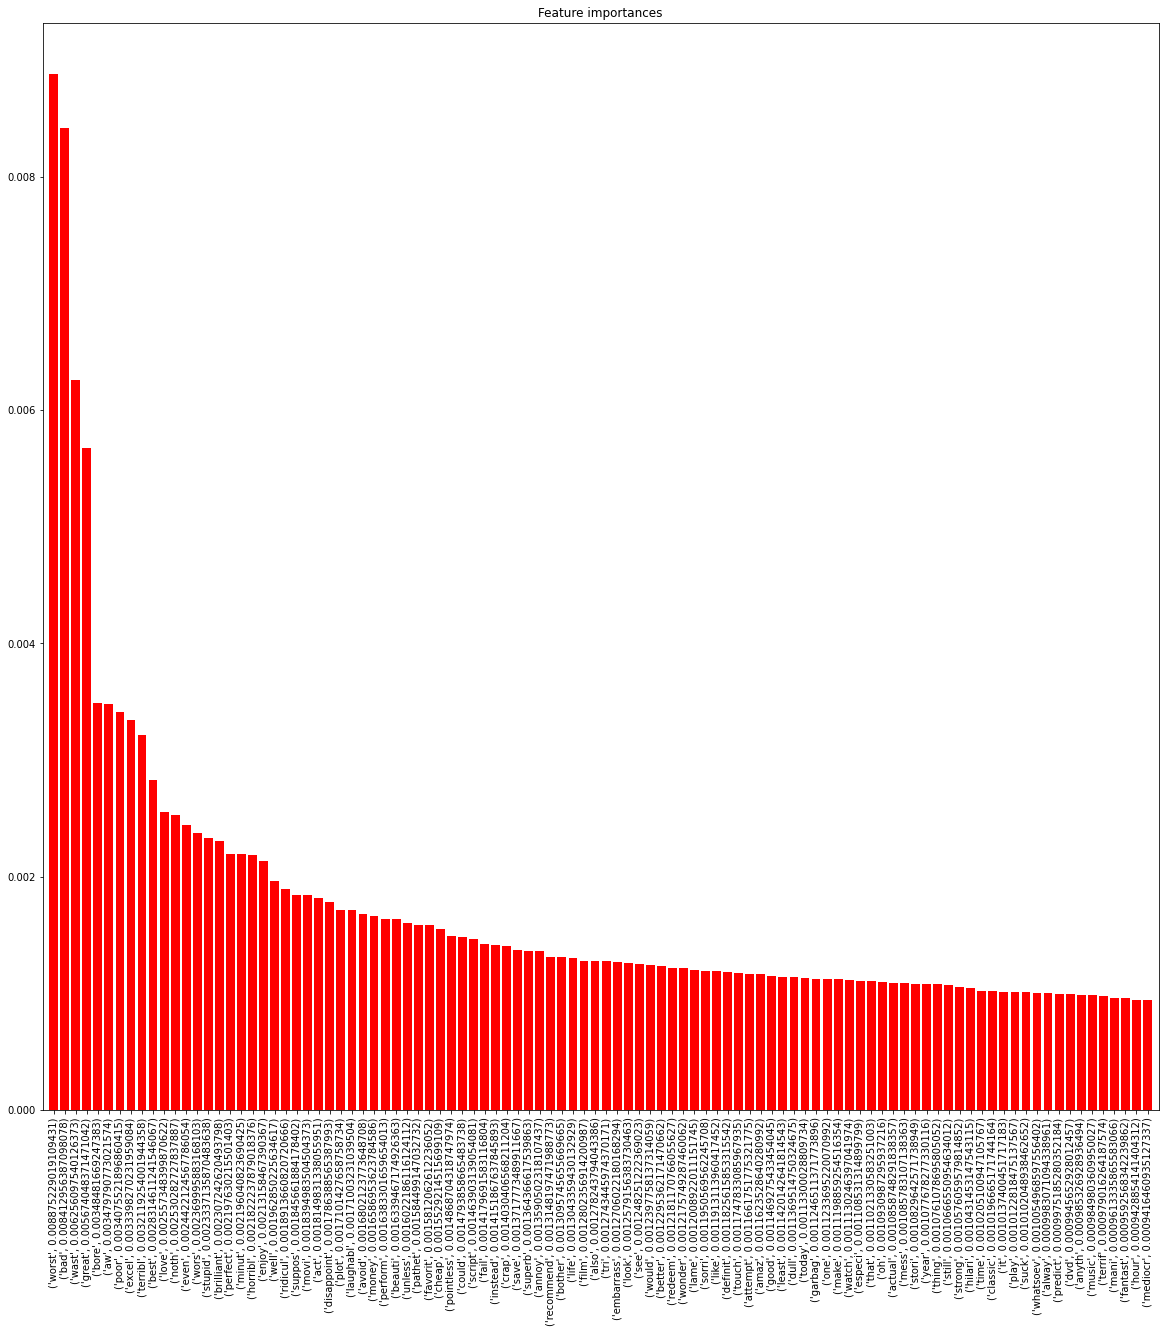

()

In [ ]:
################################# Visualising the best features ################################
print_feature(imdb_test)

Feature ranking:
feature 5414 : bad (0.001671)
feature 52665 : movi (0.001536)
feature 27089 : film (0.001439)
feature 32152 : great (0.001372)
feature 56747 : one (0.001355)
feature 88240 : worst (0.001342)
feature 45381 : like (0.001270)
feature 86325 : wast (0.001224)
feature 31559 : good (0.001197)
feature 86350 : watch (0.001170)
feature 39123 : it (0.001157)
feature 69684 : see (0.001133)
feature 25256 : even (0.001123)
feature 79809 : time (0.001114)
feature 47642 : make (0.001065)
feature 75480 : stori (0.001034)
feature 46463 : love (0.001032)
feature 78921 : the (0.001031)
feature 86703 : well (0.001027)
feature 30485 : get (0.001024)


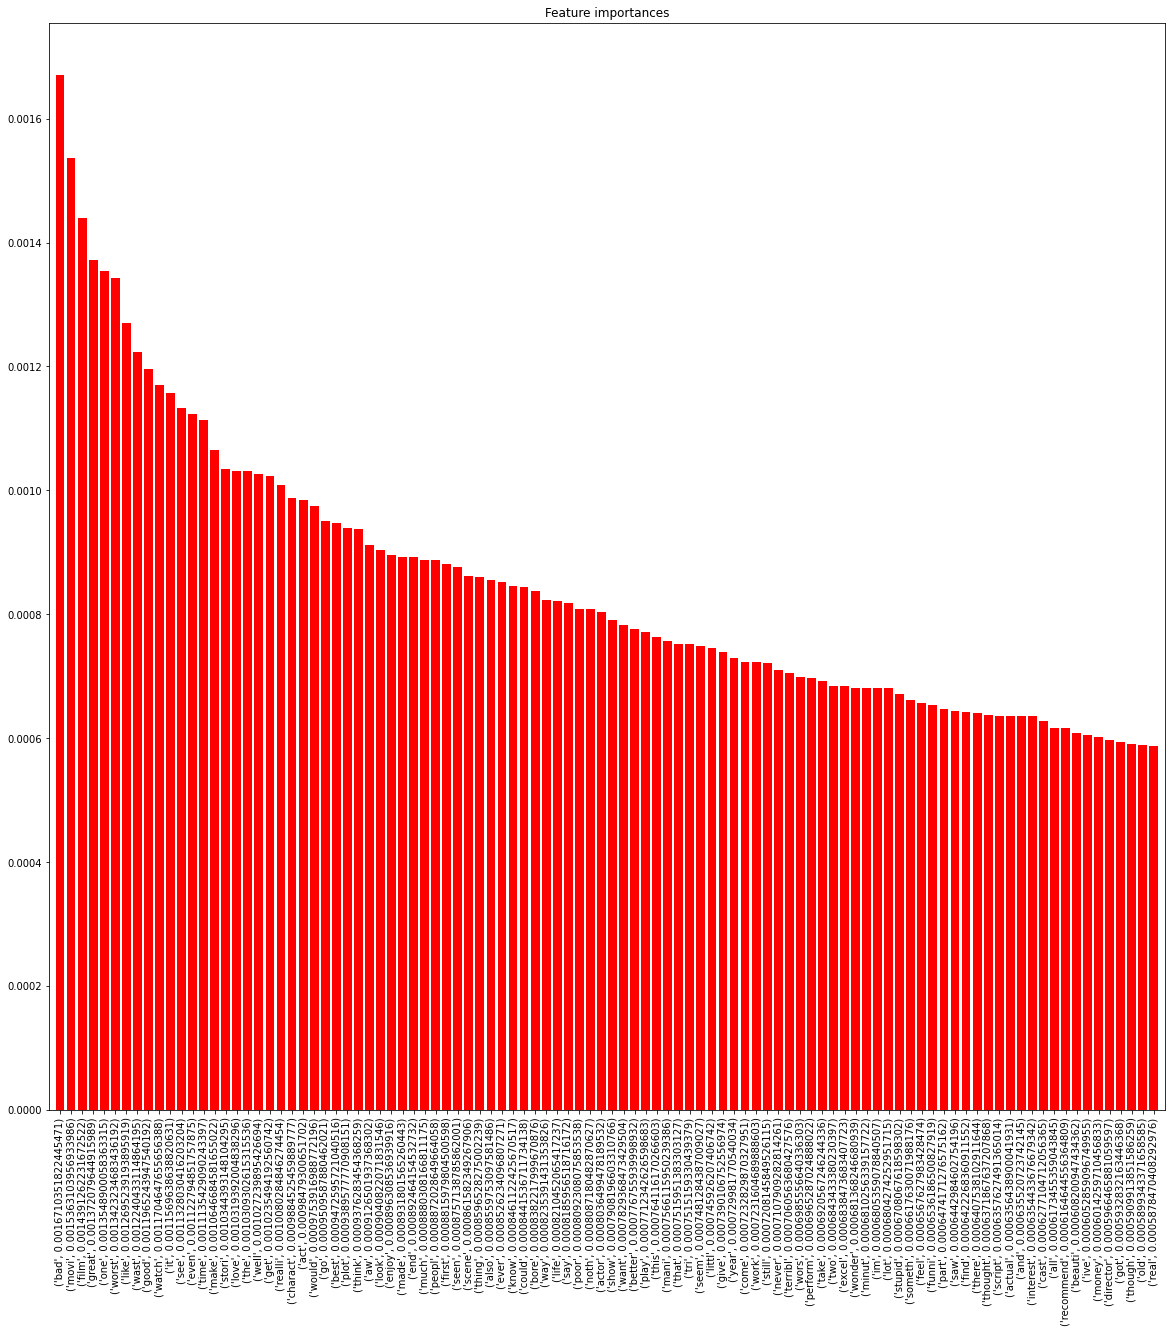

()

In [ ]:
################################# Training Set ################################
print_feature(imdb_train)

In [ ]:
################################# Get Summary of the Cleaned Dataset ###################################
imdb_test.describe()

,review,label
count,25000,25000
unique,24797,2
top,love today show varieti sole cook which would ...,neg
freq,5,12500


In [ ]:
################################# Get Summary of the Cleaned Dataset ###################################
imdb_train.describe()

,review,label
count,75000,75000
unique,74051,3
top,realiz watch exact show eight year right could...,unsup
freq,5,50000


In [ ]:
###################################### Negative set frequency of train and test combined ################################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([imdb_train, imdb_test], ignore_index = True)

# Vectorizing negative reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq[df_freq.label.isin(['neg'])].review)

# Visualising the high frequency words for negative set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(10, 'frequency')

,frequency
movi,58387
film,44962
like,24640
make,16205
bad,15847
time,15317
watch,14965
good,14918
charact,14319
realli,12353


In [ ]:
###################################### Positive set frequency of train and test combined ################################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([imdb_train, imdb_test], ignore_index = True)

# Vectorizing pos reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq[df_freq.label.isin(['pos'])].review)

# Visualising the high frequency words for positive set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
df_freq.nlargest(10, 'frequency')

,frequency
film,50860
movi,44822
like,20554
time,16619
good,15261
stori,14180
charact,14017
make,13807
great,13334
watch,12905


In [ ]:
######################### Lowest and highest frequency words ###########################

# Creating a frequency dataframe of stemmed train and test data set
df_freq = pd.concat([imdb_train, imdb_test], ignore_index = True)

# Vectorizing complete review set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_freq.review)

# Visualising the high and low frequency words for complete set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T
print(df_freq.nlargest(1, 'frequency'), sep='\n')
print(df_freq.nsmallest(1, 'frequency'), sep='\t')

      frequency
movi     206796
       frequency
aaaaa          1


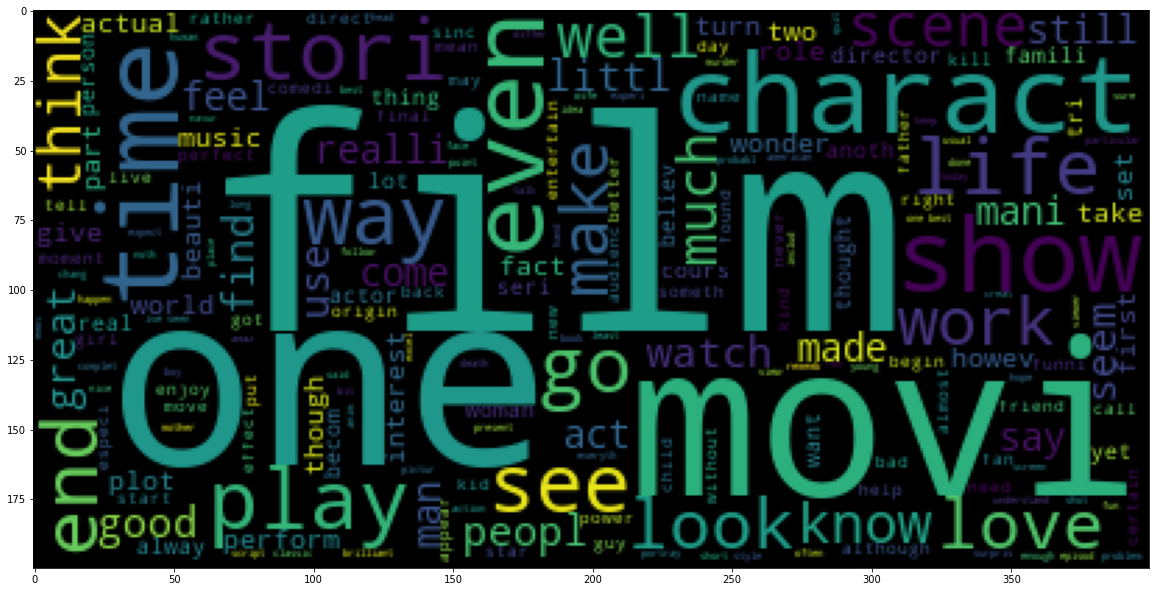

In [ ]:
########################## WordCloud Positive Train & Test set ##################################

# Creating a list of train and test data to analyse
df_freq = pd.concat([imdb_train, imdb_test], ignore_index = True)
imdb_list = df_freq["review"][df_freq.label.isin(['pos'])].unique().tolist()
imdb_bow = " ".join(imdb_list)

# Create a word cloud for psitive words
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

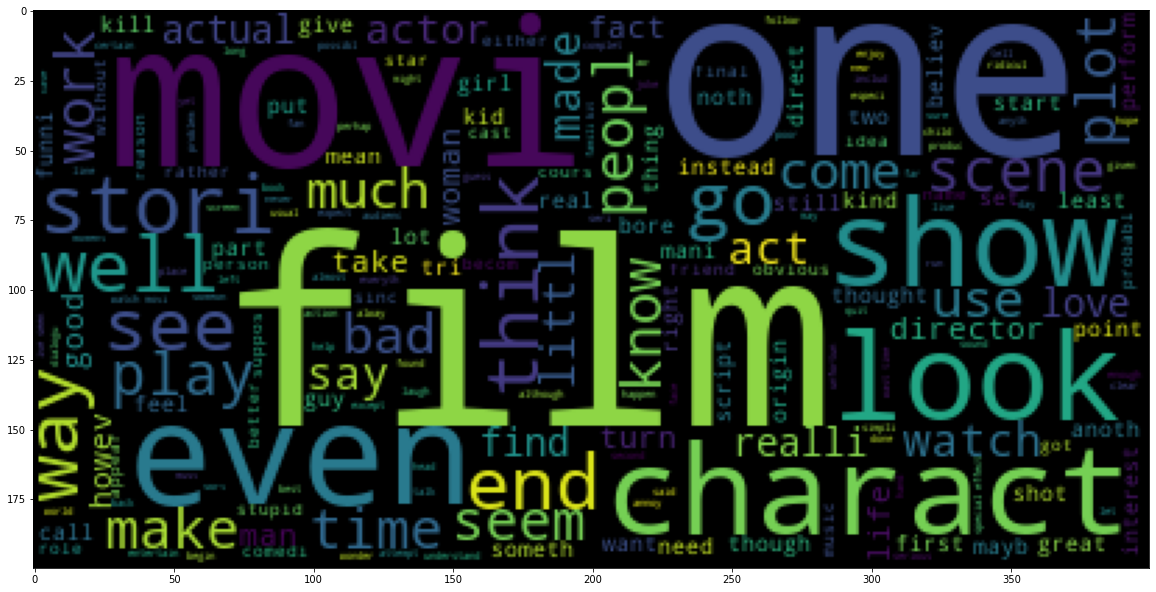

In [ ]:
########################## WordCloud Negative Train & Test set ##################################

# Creating a list of train and test data to analyse
df_freq = pd.concat([imdb_train, imdb_test], ignore_index = True)
imdb_list = df_freq["review"][df_freq.label.isin(['neg'])].unique().tolist()
imdb_bow = " ".join(imdb_list)

# Create a word cloud for negative words
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

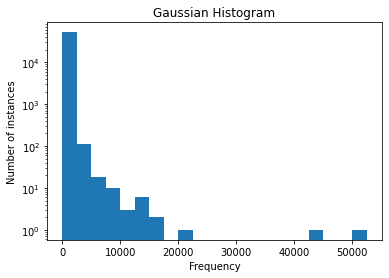

In [ ]:
########################## Histogram Positive Train & Test set ##################################

#Combining cleaned train and test data
df_freq = pd.concat([imdb_train, imdb_test], ignore_index = True)

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_pos = hist_cv.fit_transform(df_freq[df_freq.label.isin(['pos'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

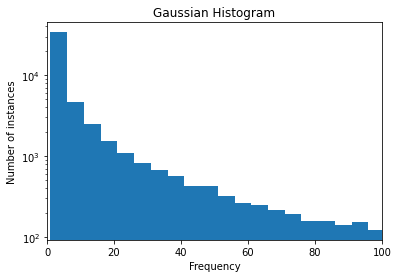

In [ ]:
# Zooming in on below 100 frequency words

zoom_data = [f for f in data[0] if f <= 100]
binwidth = 5
plt.hist(zoom_data, bins=range(min(zoom_data), max(zoom_data) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.xlim(0, 100)
plt.show()

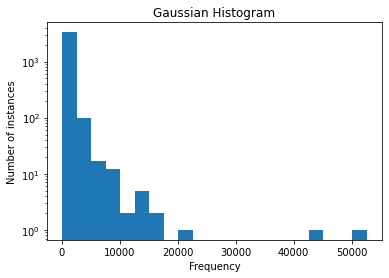

In [ ]:
# Having a look at above 100 frequency words more closely

zoom_data = [f for f in data[0] if f > 100]
binwidth = 2500
plt.hist(zoom_data, bins=range(min(zoom_data), max(zoom_data) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

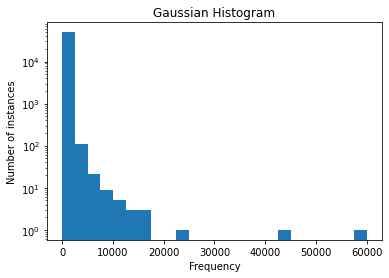

In [ ]:
########################## Histogram Negative Train & Test set ##################################

#Combining cleaned train and test data
df_freq = pd.concat([imdb_train, imdb_test], ignore_index = True)

# Creating an object for Count vectorizer and fitting it to positive dataset
hist_cv = CountVectorizer(stop_words = 'english', analyzer='word')
hist_neg = hist_cv.fit_transform(df_freq[df_freq.label.isin(['neg'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_neg.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data, bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

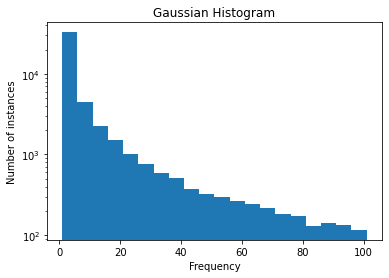

In [ ]:
# Having a look at less than 100 frequency words more closely

zoom_data = [f for f in data[0] if f <= 100]
binwidth = 5
plt.hist(zoom_data, bins=range(min(zoom_data), max(zoom_data) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

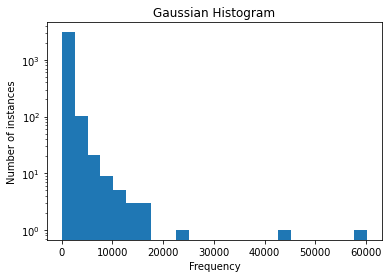

In [ ]:
# Having a look at above 100 frequency words more closely

zoom_data = [f for f in data[0] if f > 100]
binwidth = 2500
plt.hist(zoom_data, bins=range(min(zoom_data), max(zoom_data) + binwidth, binwidth), log=True)
plt.title("Gaussian Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

**Visualisation after feature selection**

---
Creating required dataset


In [ ]:
df_freq = pd.concat([imdb_train, imdb_test], ignore_index = True)

word_list = get_feature(df_freq, 1000)

# Removing non prefered words from training and test combined data
count = 0
for sentence in df_freq['review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    df_freq.loc[count, 'review'] = sentence
    count+=1

KeyboardInterrupt: ignored

Visualisation

In [ ]:
########################## WordCloud Positive Train & Test set post feature selection ##################################

# Creating a list of train and test data to analyse
imdb_list = df_freq["review"][df_freq.label.isin(['pos'])].unique().tolist()
imdb_bow = " ".join(imdb_list)

# Create a word cloud for psitive words
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()